# **Klasifikasi Emosi Pada Kalimat Menggunakan Natural Language Processing (NLP)**

## **BAB I — PENDAHULUAN**



### **1.1 Identitas**

* **Nama**: Anis Marsela
* **Topik**: Klasifikasi Emosi pada Kalimat Menggunakan Natural Language Processing (NLP)
* **Tools**: Python, Jupyter Notebook, Pandas, Scikit-Learn / TensorFlow, Matplotlib, Hugging Face Datasets
* **Dataset**: Emotions Dataset for NLP Classification Tasks
* **Sumber Dataset**:
  [www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp)

---

### **1.2 Gambaran Umum Dataset**

Dataset ini merupakan kumpulan kalimat pendek dalam bahasa Inggris yang diberi label emosi. Setiap baris terdiri dari teks dan satu label emosi, dipisahkan oleh titik koma (`;`). Dataset dibagi menjadi tiga bagian utama:

* **train.txt** — data latih
* **val.txt** — data validasi
* **test.txt** — data uji

Contoh format data:

```
i feel like I am still looking at a blank canvas blank pieces of paper;sadness
i left with my bouquet of red and yellow tulips under my arm;joy
```

Dataset ini berisi 6 emosi utama:

* **joy**
* **sadness**
* **anger**
* **fear**
* **love**
* **surprise**

Distribusi label sudah cukup seimbang untuk kebutuhan pelatihan model klasifikasi berbasis teks.

---

### **1.3 Latar Belakang & Masalah yang Hendak Diselesaikan**

Dalam era digital saat ini, masyarakat semakin banyak mengekspresikan perasaan mereka melalui teks, baik di media sosial, email, maupun layanan pelanggan. Namun, tanpa sistem otomatis, mustahil untuk mengidentifikasi dan mengelompokkan emosi dari jutaan kalimat setiap harinya.

**Masalah yang ingin diselesaikan**:

> Bagaimana cara mengklasifikasikan emosi dari sebuah kalimat secara otomatis berdasarkan teks yang diberikan?

Model yang dibangun dari tugas ini bertujuan membantu:

* **Mendeteksi emosi pelanggan dari ulasan** (customer feedback)
* **Memantau suasana hati pengguna di media sosial**
* **Menjadi dasar sistem chatbot yang empatik dan responsif**

---

### **1.4 Justifikasi Masalah**

Penelitian sebelumnya telah menunjukkan bahwa deteksi emosi dari teks sangat penting untuk berbagai aplikasi, mulai dari sistem rekomendasi hingga layanan pelanggan berbasis AI. Menurut publikasi ACL 2018 oleh [Mohammad & Bravo-Marquez](https://aclanthology.org/D18-1404/), klasifikasi emosi merupakan tugas mendesak dalam NLP yang semakin dibutuhkan dalam skenario dunia nyata.

Selain itu, deteksi emosi digunakan dalam:

* **HR analytics** untuk mengukur kesehatan mental karyawan
* **EdTech** untuk menilai mood pelajar dalam pembelajaran daring
* **Brand monitoring** untuk menilai emosi publik terhadap kampanye produk

---

### **1.5 Target Pengguna**

Pengguna dari aplikasi/layanan berbasis model ini bisa meliputi:

* **Tim layanan pelanggan** untuk memahami emosi pengguna dari percakapan teks
* **Perusahaan media sosial** untuk moderasi dan analisis sentimen
* **Peneliti dan pengembang NLP** untuk pengembangan sistem yang lebih empatik
* **Layanan kesehatan mental** yang ingin memonitor emosi pasien secara tidak langsung melalui percakapan harian

---

### **1.6 Objective**

Tujuan dari proyek ini adalah:

* Membangun model klasifikasi emosi dari teks menggunakan metode NLP
* Mengolah dataset menjadi format siap pakai untuk pelatihan model
* Mengevaluasi performa model dalam mengenali emosi berdasarkan akurasi dan metrik lainnya
* Menyediakan visualisasi dan interpretasi dari hasil prediksi model



## **BAB II - IMPORT LIBRARY**

In [27]:
# Downgrade version dari TensorFlow dan tf-keras
!pip install -q --upgrade "tensorflow<2.16" "tf-keras<2.16"

In [28]:
# Data Handling
import os
import random
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Machine Learning
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, Dense, Dropout, Bidirectional,
    LayerNormalization, GlobalMaxPooling1D
)
from tensorflow.keras.callbacks import ReduceLROnPlateau

# NLTK Setup

nltk.download('stopwords')
nltk.download('punkt_tab')
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Pastikan resource NLTK telah diunduh
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## **BAB III - DATA LOADING**

### **Membaca Data dari File**

In [29]:
# Load Data
df_train = pd.read_csv('/content/train.txt', delimiter=';', header=None, names=['sentence', 'label'])
df_val = pd.read_csv('/content/val.txt', delimiter=';', header=None, names=['sentence', 'label'])
df_test = pd.read_csv('/content/test.txt', delimiter=';', header=None, names=['sentence', 'label'])

df_train.tail()

,sentence,label
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger
15999,i know a lot but i feel so stupid because i ca...,sadness


### **Melihat Isi Dataset**

In [30]:
# Menampilkan jumlah sampel (baris) pada masing-masing dataset
print("Train samples:", len(df_train))
print("Test samples:", len(df_test))
print("Validation samples:", len(df_val))

Train samples: 16000
Test samples: 2000
Validation samples: 2000


Dataset terdiri dari 16.000 data train, 2.000 data validasi dan 2.000 data uji (test)

In [31]:
# Ringkasan data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  16000 non-null  object
 1   label     16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


Data memuat dua kolom yaitu sentence dan label. Semua entri tidak ada nilai kosong.

In [32]:
# Display Target
df_train.label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [33]:
# Menampilkan jumlah kemunculan tiap label (kelas emosi)
df_train['label'].value_counts()

,count
label,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


Joy mendominak dengan 5.365 sampel dan jumlah paling sedikit ada pada suprice (572). Distribusi label bersifat tidak seimbah (imbalanced). Hal ini berpotensi menyebabkan model bias terhadap kelas mayoritas dan kesulitan mengenali emosi minoritas

### **Cek Duplikat Data**

In [34]:
# cek jumlah data duplikat
df_train.duplicated().sum()

1

Terdapat satu data duplikat, bisa di drop saja

In [35]:
# Drop data duplikat
df_train = df_train.drop_duplicates()

## **BAB IV - DATA EXPLORATORY (EDA)**

### **Distribusi Panjang Kalimat**

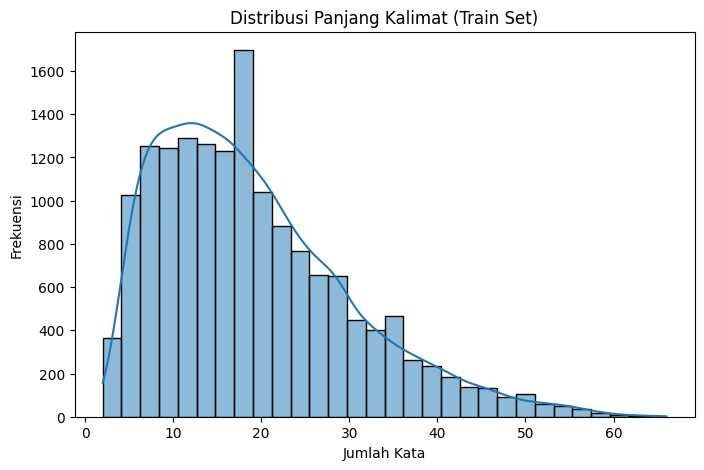

In [36]:
# Tambahkan kolom panjang kalimat
df_train['text_len'] = df_train['sentence'].apply(lambda x: len(x.split()))

# Visualisasi distribusi panjang kalimat
plt.figure(figsize=(8, 5))
sns.histplot(df_train['text_len'], bins=30, kde=True)
plt.title('Distribusi Panjang Kalimat (Train Set)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

* Mayoritas Kalimat Pendek hingga Menengah: Sebagian besar kalimat memiliki panjang antara 10 hingga 25 kata, dengan puncak sekitar 18-20 kata.

* Distribusi Right-skewed: Ada sebagian kecil kalimat yang sangat panjang (hingga lebih dari 60 kata), tapi ini adalah outlier.

### **Distribusi Label pada Dataset**

Grafik batang ini memperlihatkan jumlah data untuk masing-masing label emosi

/tmp/ipython-input-37-1694000890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='label', order=df_train['label'].value_counts().index, palette='Set2')


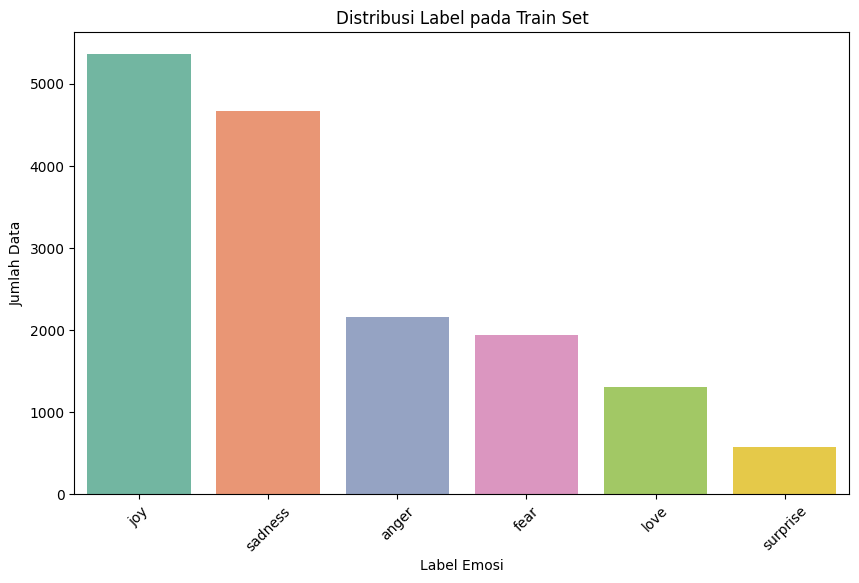

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='label', order=df_train['label'].value_counts().index, palette='Set2')
plt.title('Distribusi Label pada Train Set')
plt.xlabel('Label Emosi')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.show()


Data emosi joy dan sadness sangat mendominasi, masing masing sekitar 5.000-an data. Jumlah data yang paling sedikit yaitu label suprise dan love.  Tentunya, Ini bisa menyebabkan model bias terhadap kelas mayoritas, seperti joy dan sadness. Teknik seperti oversampling, undersampling, atau class weights dapat dipertimbangkan untuk menyeimbangkan performa.

## **BAB V - FEATURE ENGINEERING**



### **Preprocessing Functions – Pembersihan dan Normalisasi Teks**

In [ ]:
# Inisialisasi di luar fungsi (lebih efisien)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
punctuations = set(string.punctuation)

def remove_stopwords(text):
        # 1. Lowercase
    text = text.lower()

    # 2. Tokenize
    words = word_tokenize(text)

    # 3. Filtering dan lemmatizing
    cleaned_words = []
    for word in words:
        if word not in stop_words and word not in punctuations and not word.isdigit():
            lemmatized = lemmatizer.lemmatize(word)
            cleaned_words.append(lemmatized)

    # 4. Gabungkan kembali
    return ' '.join(cleaned_words)


# Fungsi untuk melakukan stemming pada kalimat
def stemming(text):

    # Inisialisasi stemmer
    stemmer = PorterStemmer()

    # Tokenisasi kalimat
    words = word_tokenize(text)

    # Gabungkan kembali kata-kata menjadi kalimat
    stemmed = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed)

# Fungsi preprocessing utama: gabungan stopword removal dan stemming
def preprocess(df):

    # Kembalikan DataFrame dengan kolom baru 'clean_text'
    df['clean_text'] = df['sentence'].apply(remove_stopwords).apply(stemming)
    return df

# Terapkan preprocessing ke masing-masing dataset
df_train = preprocess(df_train)
df_val = preprocess(df_val)
df_test = preprocess(df_test)

* Stopwords Removal membantu menghilangkan kata-kata umum yang tidak bermakna dalam klasifikasi emosi.

* Stemming menyederhanakan kata ke bentuk dasar untuk mengurangi kompleksitas data.

* Preprocessing diterapkan ke seluruh dataset untuk menjaga konsistensi dan meningkatkan efektivitas pembelajaran model.

### **Tokenization and Padding**

In [57]:
# Inisialisasi tokenizer dengan token khusus untuk kata-kata yang tidak dikenal (out-of-vocabulary)
tokenizer = Tokenizer(oov_token='<OOV>')
# Tokenizer mempelajari semua kata dari data latih yang telah dibersihkan
tokenizer.fit_on_texts(df_train['clean_text'])


# Mendapatkan ukuran kosakata (jumlah kata unik + 1 untuk padding)
vocab_size = len(tokenizer.word_index) + 1
# Menentukan panjang maksimal kalimat berdasarkan kalimat terpanjang di data latih
max_length = max(df_train['clean_text'].apply(lambda x: len(x.split())))

print(vocab_size)
print(max_length)


# Mengubah teks ke dalam bentuk urutan angka dan melakukan padding (penyesuaian panjang)
X_train = pad_sequences(tokenizer.texts_to_sequences(df_train['clean_text']), maxlen=max_length, padding='post')
X_val = pad_sequences(tokenizer.texts_to_sequences(df_val['clean_text']), maxlen=max_length, padding='post')
X_test = pad_sequences(tokenizer.texts_to_sequences(df_test['clean_text']), maxlen=max_length, padding='post')


10361
35


Langkah ini mengubah teks menjadi bentuk numerik agar dapat diproses oleh model neural network. Padding memastikan semua input memiliki panjang yang seragam, dan oov_token menjaga model tetap robust terhadap kata-kata baru saat inference.

### **Label Encoding**

LabelBinarizer untuk mengubah label kategori menjadi bentuk vektor biner (one-hot)

In [40]:
# inisialisasi
lb = LabelBinarizer()

# Fit dan transform label pada data latih
y_train = lb.fit_transform(df_train['label'])

# Transform label pada data validasi dan data uji dengan encoder yang sama
y_val = lb.transform(df_val['label'])
y_test = lb.transform(df_test['label'])

Label kategori seperti joy, sadness, dan lainnya diubah ke format numerik (one-hot encoded), yang diperlukan untuk pelatihan model klasifikasi multi-kelas. Proses ini memastikan model bisa mempelajari hubungan antara input dan label target.

## **ANN training**

### **VI.1 - MODEL DEFINITION**

In [41]:
# Set seed
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Arsitektur model LSTM dengan Bidirectional
model = Sequential([

    # Layer embedding untuk merepresentasikan kata
    Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length),
    # LSTM pertama (mengembalikan seluruh urutan)
    Bidirectional(LSTM(64, return_sequences=True)),
     # LSTM kedua (mengembalikan vektor akhir saja)
    Bidirectional(LSTM(32)),
     # Dense layer dengan ReLU
    Dense(128, activation='relu'),
    # Dropout untuk mengurangi overfitting
    Dropout(0.5),
    # Dense layer tambahan
    Dense(64, activation='relu'),
    # Dropout kedua
    Dropout(0.5),
    # Output layer dengan softmax untuk klasifikasi multi-kelas
    Dense(y_train.shape[1], activation='softmax')
])

# Kompilasi model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Custom callback: hentikan training jika akurasi cukup tinggi
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') is not None and logs.get('accuracy') > 0.9) and \
           (logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.85):
            print('\nAkurasi pada data latih telah mencapai > 90% ')
            self.model.stop_training = True

# Callback untuk menghentikan pelatihan dini jika tidak ada peningkatan val_loss
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

Model menggunakan dua lapis LSTM berarah ganda (Bidirectional) untuk menangkap konteks dari kedua arah teks.

Dropout digunakan dua kali untuk mencegah overfitting pada data training.

EarlyStopping dan custom callback membantu mencegah pelatihan berlebihan dengan menghentikan training ketika kinerja cukup tinggi.

### **VI.2 - MODEL TRAINING**

In [42]:
# Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    shuffle=False,
    callbacks=[myCallback(), early_stopping],
    verbose=2
)

Epoch 1/20
500/500 - 45s - loss: 1.3815 - accuracy: 0.4100 - val_loss: 0.9212 - val_accuracy: 0.6345 - 45s/epoch - 90ms/step
Epoch 2/20
500/500 - 32s - loss: 0.7160 - accuracy: 0.7237 - val_loss: 0.6720 - val_accuracy: 0.7600 - 32s/epoch - 64ms/step
Epoch 3/20
500/500 - 35s - loss: 0.4427 - accuracy: 0.8434 - val_loss: 0.4617 - val_accuracy: 0.8625 - 35s/epoch - 70ms/step
Epoch 4/20

Akurasi pada data latih telah mencapai > 90% 
500/500 - 32s - loss: 0.2555 - accuracy: 0.9211 - val_loss: 0.4228 - val_accuracy: 0.8805 - 32s/epoch - 65ms/step


### **VI.3 - MODEL EVALUATION**

In [43]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=lb.classes_))


63/63 [==============================] - 3s 16ms/step

Classification Report:
              precision    recall  f1-score   support

       anger       0.83      0.88      0.86       275
        fear       0.91      0.84      0.88       224
         joy       0.90      0.92      0.91       695
        love       0.70      0.71      0.70       159
     sadness       0.94      0.93      0.93       581
    surprise       0.67      0.62      0.65        66

    accuracy                           0.88      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.88      0.88      0.88      2000



* Model mencapai 89% akurasi pada data uji — menunjukkan performa sangat baik secara umum.

* joy dan sadness memiliki f1-score tertinggi (0.92 dan 0.94). Ini wajar karena jumlah data latihnya juga paling banyak (imbangan kelas mendukung).

* anger dan fear juga menunjukkan performa kuat, dengan f1-score sekitar 0.87–0.89.

* surprise memiliki performa paling lemah (f1-score: 0.60), kemungkinan besar karena jumlah data yang sangat kecil (hanya 66 contoh).

* love juga tergolong sedang (f1-score: 0.72), dan bisa ditingkatkan dengan augmentasi data atau pembobotan kelas.

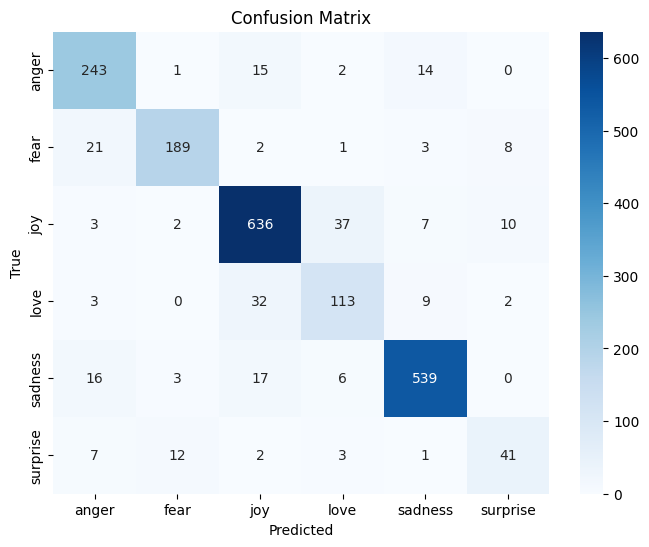

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true_labels, y_pred_labels), annot=True, fmt='d',
            xticklabels=lb.classes_, yticklabels=lb.classes_, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



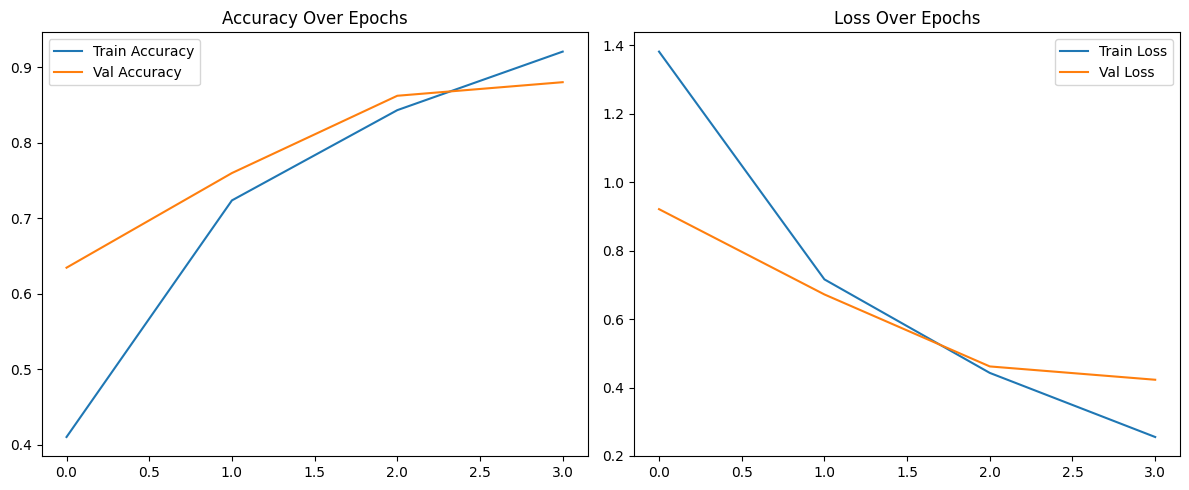

In [45]:
# 11. Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

## **VII. ANN IMPROVEMENT**

### **Model Definition**

In [46]:


# Improved ANN Model
model_improved = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
    LayerNormalization(),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model_improved.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)


In [47]:
# Training Improved Model
history_improved = model_improved.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    shuffle=False,
    callbacks=[myCallback(), early_stop, reduce_lr],
    verbose=2
)

Epoch 1/50
500/500 - 69s - loss: 1.3442 - accuracy: 0.4457 - val_loss: 0.5644 - val_accuracy: 0.7895 - lr: 0.0010 - 69s/epoch - 139ms/step
Epoch 2/50
500/500 - 64s - loss: 0.5123 - accuracy: 0.8194 - val_loss: 0.3397 - val_accuracy: 0.8700 - lr: 0.0010 - 64s/epoch - 129ms/step
Epoch 3/50
500/500 - 56s - loss: 0.3216 - accuracy: 0.8875 - val_loss: 0.3189 - val_accuracy: 0.8775 - lr: 0.0010 - 56s/epoch - 112ms/step
Epoch 4/50

Akurasi pada data latih telah mencapai > 90% 
500/500 - 58s - loss: 0.2408 - accuracy: 0.9155 - val_loss: 0.3347 - val_accuracy: 0.8895 - lr: 0.0010 - 58s/epoch - 116ms/step


### **Model Training**

### **Model Evaluasi**

In [48]:
# Evaluation
test_loss_improved, test_acc_improved = model_improved.evaluate(X_test, y_test)
print(f'\nImproved Test Accuracy: {test_acc_improved:.4f}')

63/63 [==============================] - 1s 18ms/step - loss: 0.3305 - accuracy: 0.8975

Improved Test Accuracy: 0.8975


In [49]:
# Prediction & Report
y_pred_improved = model_improved.predict(X_test)
y_pred_labels_improved = np.argmax(y_pred_improved, axis=1)
y_true_labels_improved = np.argmax(y_test, axis=1)

print("\nImproved Classification Report:")
print(classification_report(y_true_labels_improved, y_pred_labels_improved, target_names=lb.classes_))

63/63 [==============================] - 2s 16ms/step

Improved Classification Report:
              precision    recall  f1-score   support

       anger       0.86      0.93      0.89       275
        fear       0.87      0.89      0.88       224
         joy       0.94      0.89      0.92       695
        love       0.68      0.84      0.75       159
     sadness       0.96      0.93      0.95       581
    surprise       0.73      0.71      0.72        66

    accuracy                           0.90      2000
   macro avg       0.84      0.87      0.85      2000
weighted avg       0.90      0.90      0.90      2000



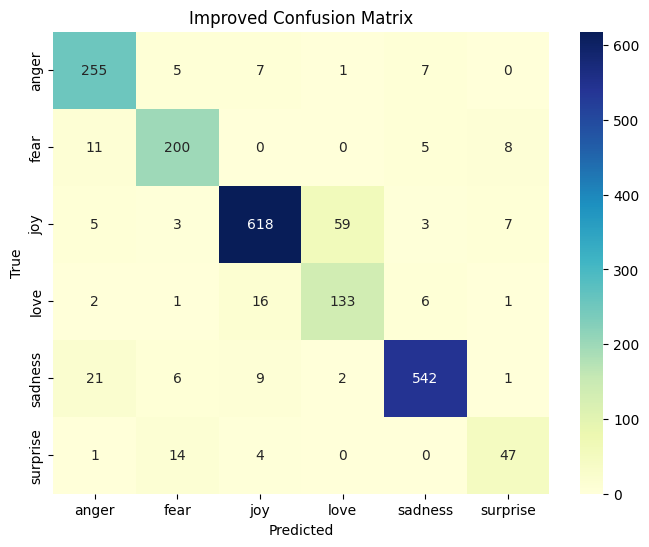

In [50]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true_labels_improved, y_pred_labels_improved), annot=True, fmt='d',
            xticklabels=lb.classes_, yticklabels=lb.classes_, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Improved Confusion Matrix')
plt.show()


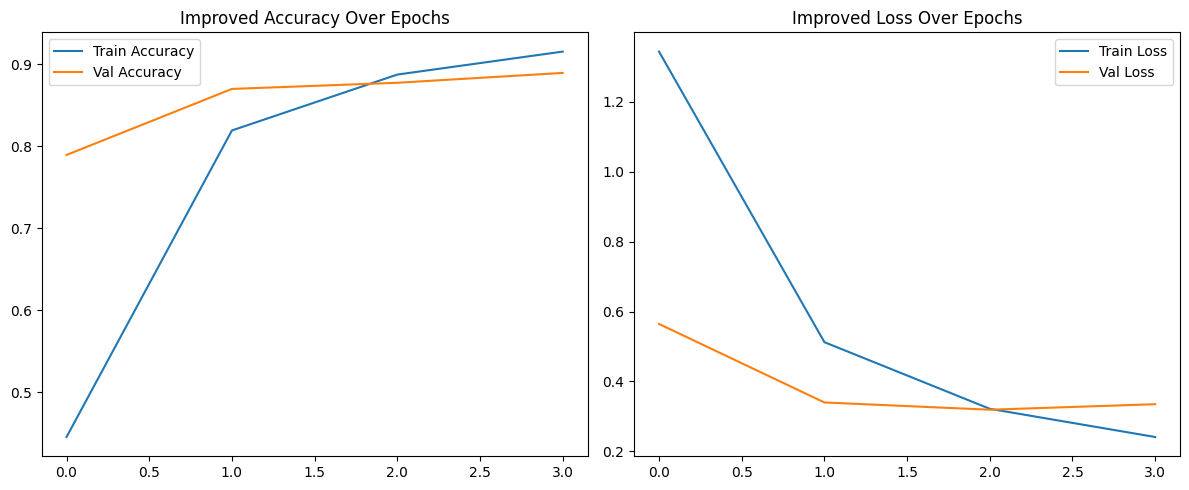

In [51]:

# Accuracy & Loss Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['accuracy'], label='Train Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Val Accuracy')
plt.title('Improved Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_improved.history['loss'], label='Train Loss')
plt.plot(history_improved.history['val_loss'], label='Val Loss')
plt.title('Improved Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

## **BAB IX - MODEL SAVING**

In [54]:
# Simpan model ke file .h5
model_improved.save('model.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
import pickle

# Simpan tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Simpan label binarizer
with open('label_binarizer.pkl', 'wb') as f:
    pickle.dump(lb, f)
